<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
!wget https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/colored_ad_click_table.csv -O colored_ad_click_table.csv

--2024-08-16 03:54:42--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-08-16 03:54:42--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf [following]
--2024-08-16 03:54:43--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [18]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

## 9-1

In [8]:
df = pd.read_csv('colored_ad_click_table.csv')
num_rows, num_cols = df.shape
print(f"테이블은 {num_rows}개의 행과 {num_cols}개의 열로 구성됩니다")

테이블은 30개의 행과 41개의 열로 구성됩니다


## 9-2

In [9]:
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

## 9-3

In [10]:
print(df.Color.values)

['Pink' 'Gray' 'Sapphire' 'Purple' 'Coral' 'Olive' 'Navy' 'Maroon' 'Teal'
 'Cyan' 'Orange' 'Black' 'Tan' 'Red' 'Blue' 'Brown' 'Turquoise' 'Indigo'
 'Gold' 'Jade' 'Ultramarine' 'Yellow' 'Virdian' 'Violet' 'Green'
 'Aquamarine' 'Magenta' 'Silver' 'Bronze' 'Lime']


## 9-4

In [11]:
assert 'Blue' in df.Color.values

## 9-5

In [12]:
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1']
print(df[selected_columns].describe())

       Click Count: Day 1  View Count: Day 1
count           30.000000               30.0
mean            23.533333              100.0
std              7.454382                0.0
min             12.000000              100.0
25%             19.250000              100.0
50%             24.000000              100.0
75%             26.750000              100.0
max             49.000000              100.0


## 9-6

In [13]:
view_columns = [column for column in df.columns if 'View' in column]
assert np.all(df[view_columns].values == 100)

## 9-7

In [14]:
df.drop(columns=view_columns, inplace=True)
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')


## 9-8

In [15]:
df.set_index('Color', inplace=True)
print(df.T.Blue.describe())

count    20.000000
mean     28.350000
std       5.499043
min      18.000000
25%      25.750000
50%      27.500000
75%      30.250000
max      42.000000
Name: Blue, dtype: float64


## 9-9

In [16]:
df_not_blue = df.T.drop(columns='Blue')
print(df_not_blue.head(2))

Color               Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon  \
Click Count: Day 1    21    27        30      26     26     26    38      21   
Click Count: Day 2    20    27        32      21     24     19    29      29   

Color               Teal  Cyan  ...  Ultramarine  Yellow  Virdian  Violet  \
Click Count: Day 1    25    24  ...           49      14       27      15   
Click Count: Day 2    25    22  ...           41      24       23      22   

Color               Green  Aquamarine  Magenta  Silver  Bronze  Lime  
Click Count: Day 1     14          24       18      26      19    20  
Click Count: Day 2     25          28       21      24      19    19  

[2 rows x 29 columns]


## 9-10

In [17]:
def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b)
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() - sample_b.mean()) >= extreme_mean_diff:
            number_extreme_values += 1

    p_value = number_extreme_values / 30000
    return p_value

## 9-11

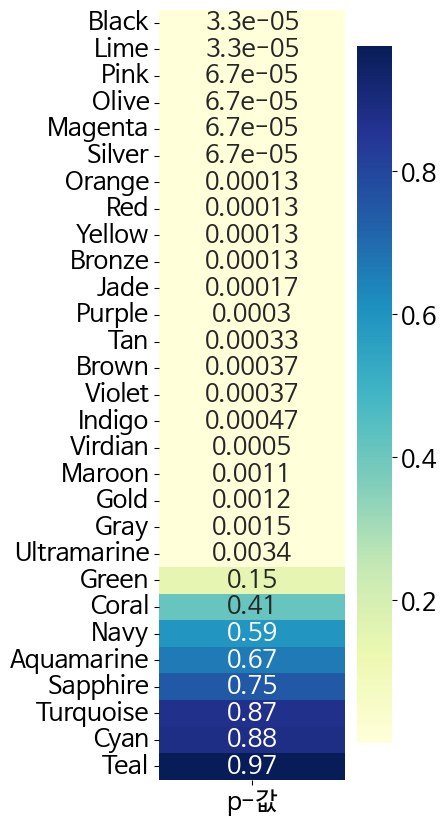

In [20]:
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks)
    color_to_p_value[color] = p_value

sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(),
key=lambda x: x[1]))
plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values],
            cmap='YlGnBu', annot=True, xticklabels=['p-값'],
            yticklabels=sorted_colors)
plt.show()

## 9-12

In [21]:
mean_black = df_not_blue.Black.mean()
print(f"검은색의 평균 클릭률은 {mean_black} 입니다")

검은색의 평균 클릭률은 21.6 입니다


## 9-13

In [22]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
size = remaining_colors.size
print(f"{size}개의 색상이 파란색 보다 평균적으로 높은 클릭률을 갖습니다.")
print("구체적으로는 다음과 같습니다.")
print(remaining_colors.values)

5개의 색상이 파란색 보다 평균적으로 높은 클릭률을 갖습니다.
구체적으로는 다음과 같습니다.
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


## 9-14

In [23]:
for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
    if color in remaining_colors:
        mean = df_not_blue[color].mean()
        print(f"{color}는 {p_value}의 p-값과 {mean}의 평균을 가집니다")

Ultramarine는 0.0034의 p-값과 34.2의 평균을 가집니다
Navy는 0.5911666666666666의 p-값과 29.3의 평균을 가집니다
Aquamarine는 0.6654666666666667의 p-값과 29.2의 평균을 가집니다
Sapphire는 0.7457666666666667의 p-값과 28.9의 평균을 가집니다
Teal는 0.9745의 p-값과 28.45의 평균을 가집니다


## 9-15

In [24]:
significance_level = 0.05 / 29
print(f"조정된 유의 수준은 {significance_level}입니다")
if color_to_p_value['Ultramarine'] <= significance_level:
    print("우리의 p-값은 통계적으로 유의합니다")
else:
    print("우리의 p-값은 통계적으로 유의하지 않습니다")

조정된 유의 수준은 0.001724137931034483입니다
우리의 p-값은 통계적으로 유의하지 않습니다


## 9-16

In [25]:
hypothetical_sig_level = 0.05 / 5
print(f"가상의 유의 수준은 {hypothetical_sig_level}입니다")
if color_to_p_value['Ultramarine'] <= hypothetical_sig_level:
    print("우리의 가상의 p-값은 통계적으로 유의합니다")
else:
    print("우리의 가상의 p-값은 통계적으로 유의하지 않습니다")

가상의 유의 수준은 0.01입니다
우리의 가상의 p-값은 통계적으로 유의합니다
